In [78]:
#importing important librarier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [79]:
#loading data
df=pd.read_csv("adver.csv")

In [80]:
#Exploring Data
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [81]:
#droping Unnamed: 0
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [82]:
#checking shape
df.shape

(200, 4)

In [83]:
#there are 200 rows and 4 columns

In [84]:
#checking for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [85]:
#there is no null value

In [86]:
#EDA
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [87]:
#in the newspaper column there is huge difference between 7=75 percentile and maximum value so there might be some outliers
#there are wors with 0 in newspaper column
#the mean in newspaper is greater than median so the variable is right skewed

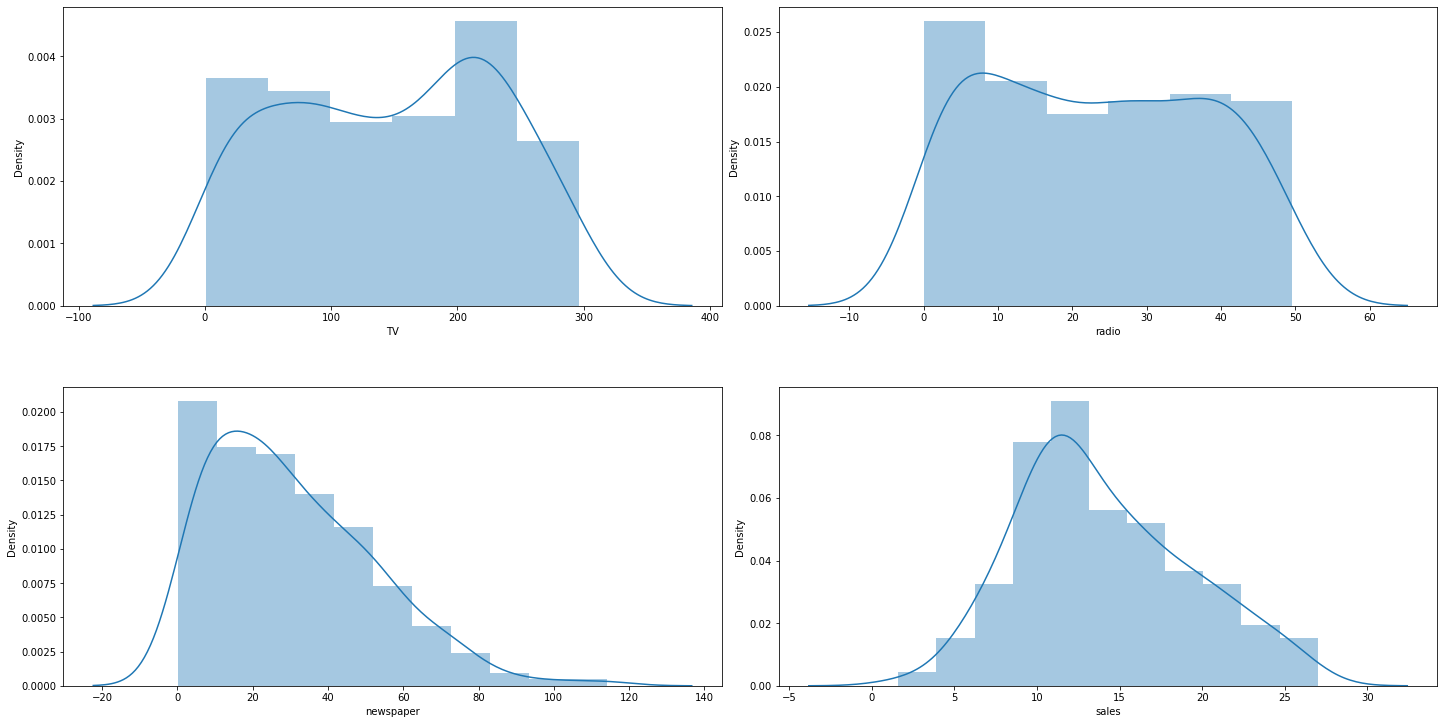

In [88]:
#Univariate analysis
#ploting distplot
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [89]:
#the sales data is showing bell curved shape.
#the newspaper data is heavely right skwed and majority of the values lies between 0 and 40
#in the tv variable the range is from 0 to 300
#in radio the range is 0 to 50


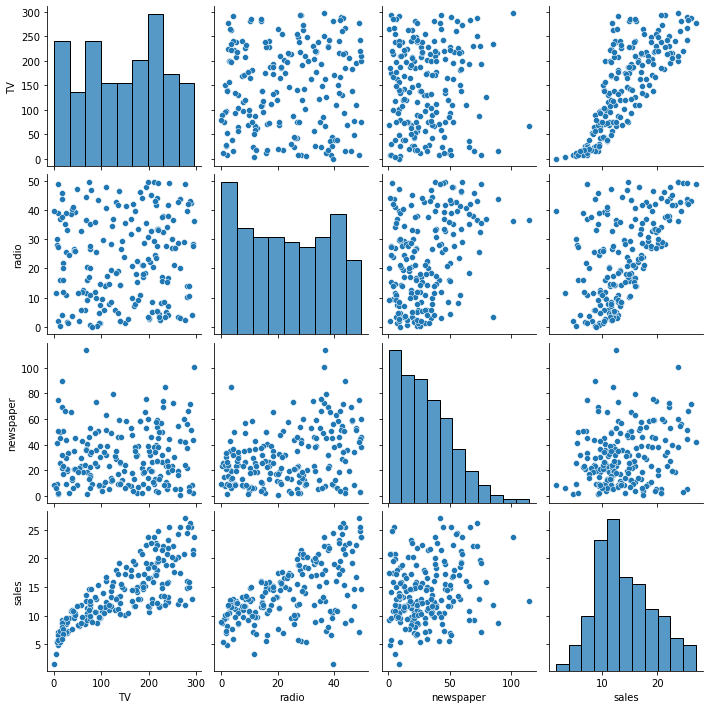

In [90]:
#bivariate analysis
sns.pairplot(df)

In [91]:
#the Tv is showing linear relation with the sale. with the increse in amount of television advertisment also leading to increase the amount of sales
#radios is also showing some linear relation swith sales however it is not as good as tv
#newspaper is very showing no relation with numbers of sales
### the TV is the best way to advertise and newspaper is the least preferable.

In [92]:
##multivariate analysis

<Figure size 2160x2160 with 0 Axes>

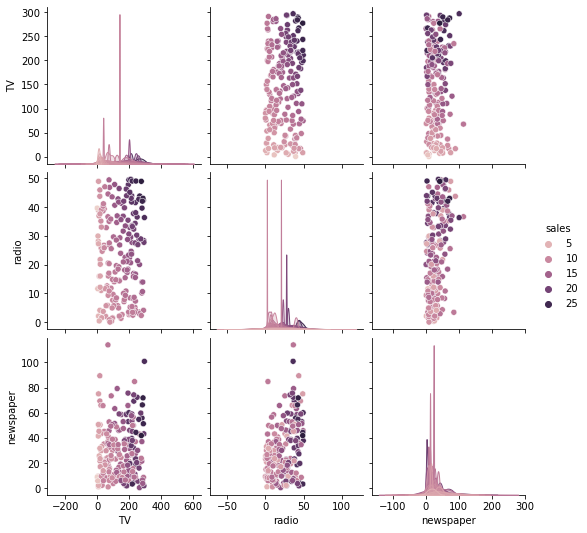

In [93]:
plt.figure(figsize=(30,30))
sns.pairplot(df, hue="sales")

In [94]:
#in the clusters of tv and radio there are more sales with nuber 25
#while with newpaper with ever other variable the sales over 20 and 25 is low

In [95]:
#checking correlation
cor=df.corr()

<AxesSubplot:>

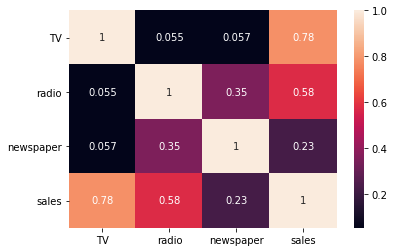

In [96]:
#correlation heatmap
sns.heatmap(cor, annot=True)

In [97]:
#the tv and sales are highly correlated and the newspaper and sales are least correlated 


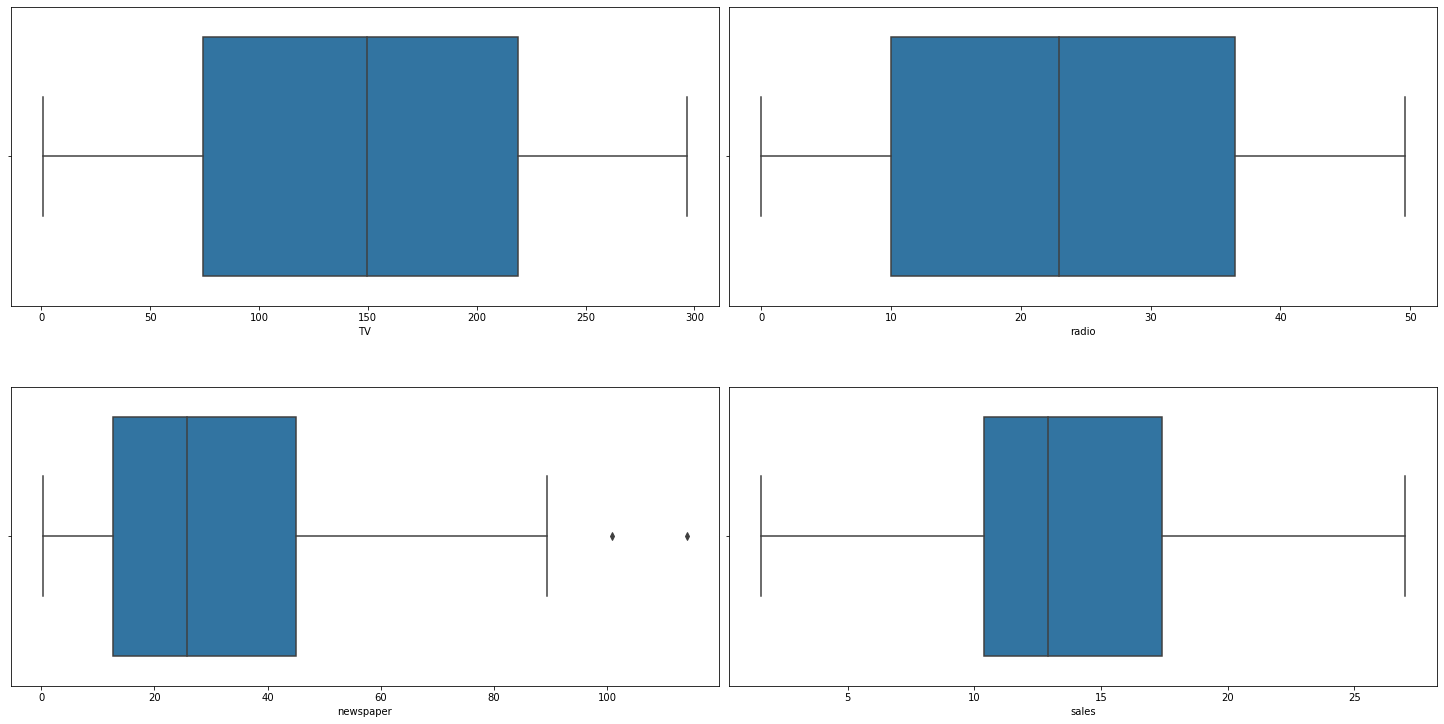

In [98]:
#ploting boxplot for outliers
#ploting boxplot
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [99]:
#checking skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [100]:
#there is skewness and outliers present in newspaper

In [101]:
#using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [102]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


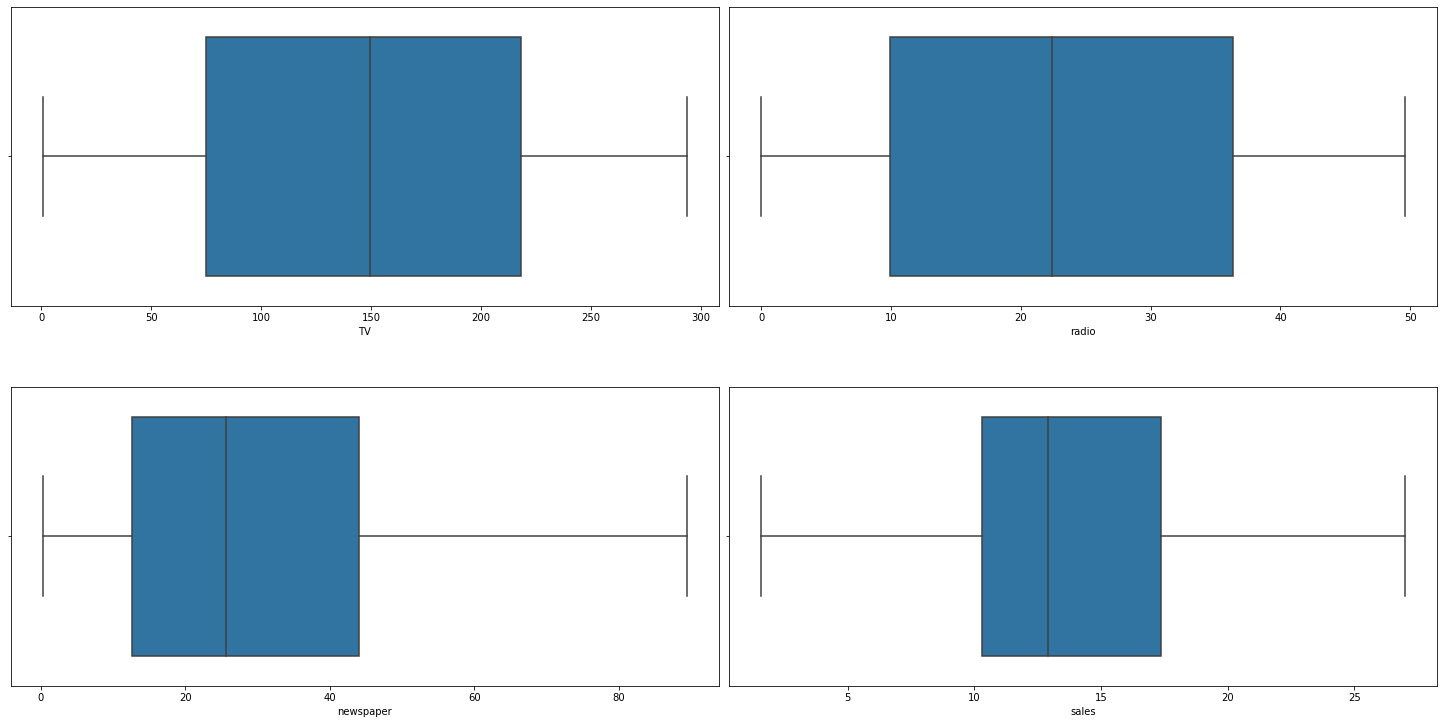

In [103]:
#ploting boxplot
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df_new.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [104]:
#there is no outliers present in the data

In [105]:
#checking for skewness
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [106]:
#the skewness is still more than .5 in newspaper

In [107]:
#spliting data in x and x

In [108]:
x=df_new.drop("sales",axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [109]:
y=df_new["sales"]

In [110]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [111]:
#using power transform to reduce skewness

In [112]:
d1=power_transform(x)

In [113]:
d1=pd.DataFrame(d1, columns=x.columns)
d1

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [114]:
d1.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [115]:
#the skewness has been treated
x=d1

In [116]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((138, 3), (138,), (60, 3), (60,))

In [117]:
#building model
#creating function 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
    print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
    print("""r2 score is:
    
    """,r2_score(y_test,predict))

In [118]:
#LineraRegression
model(LinearRegression)

mean squared error is:
     3.0402472682497304
The mean absolute error is:  1.2461117138358475
r2 score is:
    
     0.8956637717653416


In [119]:
print(cross_val_score(LinearRegression(),x,y,cv=5).mean())

0.8958270968555071


In [120]:
#ridge
model(Ridge)

mean squared error is:
     3.089789910589976
The mean absolute error is:  1.253398673469673
r2 score is:
    
     0.893963550703541


In [121]:
print(cross_val_score(Ridge(),x,y,cv=5).mean())

0.895919188029818


In [122]:
#lasso
model(Lasso)

mean squared error is:
     6.566123752398465
The mean absolute error is:  1.8208528137263411
r2 score is:
    
     0.7746615567747354


In [123]:
print(cross_val_score(Lasso(),x,y,cv=5).mean())

0.825813015051709


In [124]:
#decisiontreeregressor
model(DecisionTreeRegressor)

mean squared error is:
     1.1655
The mean absolute error is:  0.905
r2 score is:
    
     0.9600019790240609


In [125]:
print(cross_val_score(DecisionTreeRegressor(),x,y,cv=5).mean())

0.9553316550101192


In [126]:
#randomforestregressor
model(RandomForestRegressor)

mean squared error is:
     0.6924496166666637
The mean absolute error is:  0.6255499999999987
r2 score is:
    
     0.9762362811735613


In [127]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=5).mean())

0.9760113277860899


In [128]:
#extratreesreressor
model(ExtraTreesRegressor)

mean squared error is:
     0.49469003333333267
The mean absolute error is:  0.4387000000000008
r2 score is:
    
     0.9830230610640458


In [129]:
print(cross_val_score(ExtraTreesRegressor(),x,y,cv=5).mean())

0.9864420111298916


In [130]:
#extratreesregressor is the best model
#setting parameter for hypertuning
parameter={"max_depth":np.arange(2,10),
          "criterion":["mse","mae", "friedman_mse"]
          }

In [131]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [132]:
#checking best parameters
gcv.best_params_

{'criterion': 'mae', 'max_depth': 8}

In [133]:
#best model with best parameters
best_model=ExtraTreesRegressor(criterion="friedman_mse", max_depth=9)
best_model.fit(x_train,y_train)
predict=best_model.predict(x_test)
print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
print("""r2 score is:
    
    """,r2_score(y_test,predict))

mean squared error is:
     0.5025984189475272
The mean absolute error is:  0.4586070212195198
r2 score is:
    
     0.9827516584268237


In [134]:
#savingThemodel
import joblib
joblib.dump(best_model,"AdvertismentSales.pkl")

['AdvertismentSales.pkl']